### Step-1: import Libraries

In [379]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import joblib
import warnings
warnings.filterwarnings('ignore')

### Step-2: Data Collecction

In [380]:
df=pd.read_csv(r"C:\Users\NAVEEN\Downloads\Mall_Customers.csv")

In [381]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [382]:
df.shape

(200, 5)

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [384]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Step-3: Data Preprocessing

In [385]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Step- 4: Exploratory Data Analysis

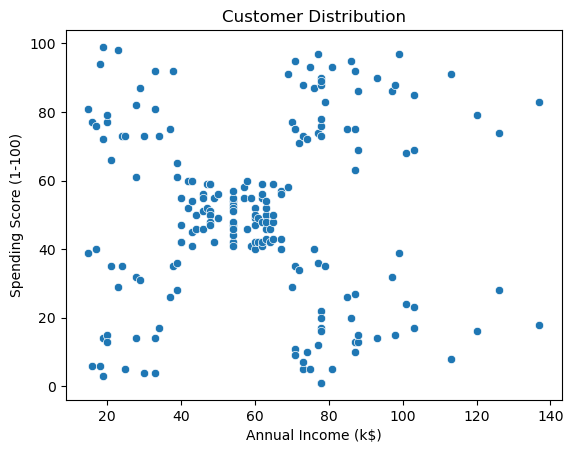

In [386]:
# Scatter plot of features
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Customer Distribution')
plt.show()


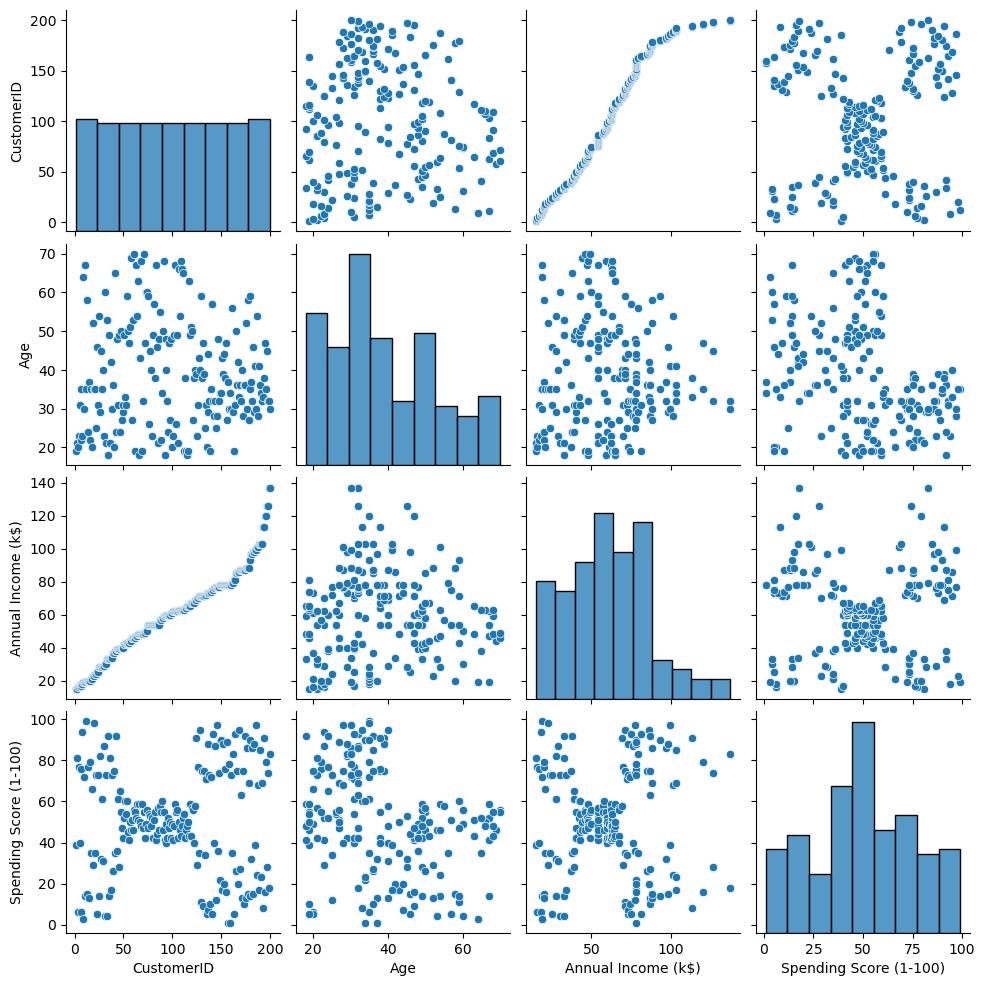

In [387]:
sns.pairplot(df)

## Step-5: Feature Scaling

In [388]:
## StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])


In [389]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### Step-6: Model Building (KMeans Clustering)

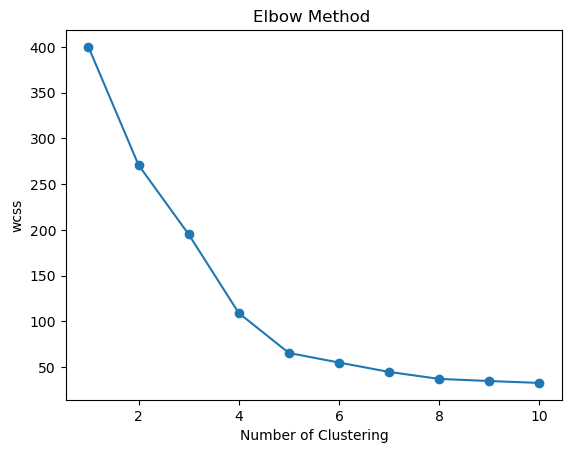

In [390]:
## Elbow Method to find optimal number of clusters

wcss=[]
for i in range(1,11):
    k_means=  KMeans(n_clusters=i)
    k_means.fit(x)
    wcss.append(k_means.inertia_)
    
plt.plot(range(1,11),wcss,marker='o')
plt.title("Elbow Method ")
plt.xlabel("Number of Clustering")
plt.ylabel('wcss')
plt.show()          

In [391]:
x = df[['Annual Income (k$)','Spending Score (1-100)']]
k_means = KMeans(n_clusters=5,random_state=42)
y_kmeans=k_means.fit_predict(x)

### Step-7: Model Evaluation & Visualization

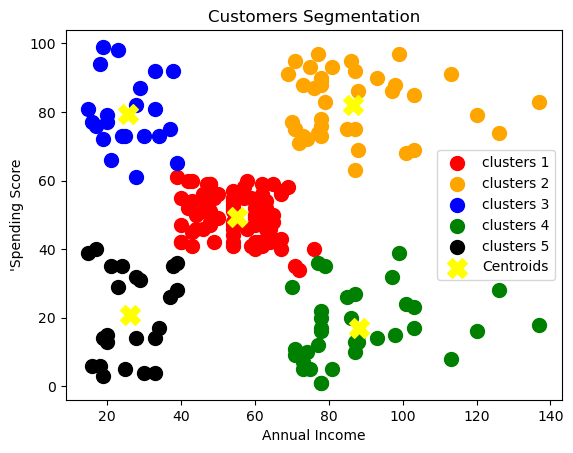

In [392]:
plt.scatter(x.iloc[y_kmeans==0,0],x.iloc[y_kmeans==0,1],s=100,c='red',label='clusters 1')
plt.scatter(x.iloc[y_kmeans==1,0],x.iloc[y_kmeans==1,1],s=100,c='orange',label='clusters 2')
plt.scatter(x.iloc[y_kmeans==2,0],x.iloc[y_kmeans==2,1],s=100,c='blue',label='clusters 3')
plt.scatter(x.iloc[y_kmeans==3,0],x.iloc[y_kmeans==3,1],s=100,c='green',label='clusters 4')
plt.scatter(x.iloc[y_kmeans==4,0],x.iloc[y_kmeans==4,1],s=100,c='black',label='clusters 5')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=200,c='yellow',marker='X', label='Centroids')
plt.title("Customers Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("'Spending Score")
plt.legend()
plt.show()

In [393]:
kmeans.predict([[10,40]])

array([4])

### Step-8: Save The Model

In [394]:
joblib.dump(k_means,'Customer_Segmentation')

['Customer_Segmentation']

In [395]:
model = joblib.load('Customer_Segmentation')

In [396]:
model.predict([[13,50]])

array([4])